### Configuration

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn import datasets


### SKLearn Iris Data Loader and DataFrame Visualization

In [2]:
# Write Code !!
iris = datasets.load_iris()
iris

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### X,y data Generator...Feature and Label

In [3]:
# Write Code !!
# 속성을 X에 할당, 라벨을 y에 각각 할당한다
X = iris.data
y = iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Training, Test 데이타를 8:2로 비율로 섞고, random_state=42로 지정
    X_train, X_test, y_train, y_test 로 각각 할당된 값들을 torch 타입으로 변환 
    torch.FloatTensor(), torch.LongTensor 사용함

In [4]:
from sklearn.model_selection import train_test_split
# Write Code !!
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


#### 하이퍼파라미터 지정

In [5]:
input_size = 4
hidden_size = 56
num_classes = 3
num_epochs = 100
learning_rate = 0.01

### NeuralNetwork  Model Definition

In [6]:
class NeuralNet(nn.Module): 
    def __init__(self, input_size, hidden_size, num_classes): 
        # Write Code !!
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
       # Write Code !!
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
    
        return out 

### NeuralNetwork  Model Excution , loss, optimizer, backward ..
    Forward Propagation and Baward Propagation

In [7]:
# Write Code !!
'''
epoch 0, loss is 1.1057885885238647
epoch 10, loss is 0.5373063683509827
epoch 20, loss is 0.3831348121166229
epoch 30, loss is 0.2844321131706238
epoch 40, loss is 0.21099719405174255
epoch 50, loss is 0.15766146779060364
epoch 60, loss is 0.12355705350637436
epoch 70, loss is 0.10255012661218643
epoch 80, loss is 0.08930723369121552
epoch 90, loss is 0.08066073060035706
'''
model = NeuralNet(input_size, hidden_size, num_classes)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_values = []


for epoch in range(num_epochs): # 100번 학습한다...for를 100번 반복
    # numpy arrays를 torch의 Tensor로 만들어서 머신에 입력해야 한다.
    inputs = X_train # X
    targets = y_train # y
    
    # Forward Pass
    pred = model(inputs)
    loss = loss_function(pred, targets)
    
    # Backward and Optimization
    optimizer.zero_grad() # 이 부분이 가장 먼저 나와야 한다...초기화
    loss.backward()
    optimizer.step()
    
    loss_values.append(loss.item())
    
    if(epoch) % 10 == 0:
        print('epoch {}, loss is {}'.format(epoch,loss.item()))
# 학습은 100번을 반복합니다 학습이 진행됨에 따라서 Loss가 감소하는 것을 볼수 있도록 출력합니다.

epoch 0, loss is 1.2305724620819092
epoch 10, loss is 0.5820814967155457
epoch 20, loss is 0.38563811779022217
epoch 30, loss is 0.25811684131622314
epoch 40, loss is 0.17235428094863892
epoch 50, loss is 0.12436175346374512
epoch 60, loss is 0.09930839389562607
epoch 70, loss is 0.08558964729309082
epoch 80, loss is 0.07746841758489609
epoch 90, loss is 0.07229205965995789


In [8]:
#  학습을 마친 최종적인 모델의 값을 저장. model.ckpt 파일로 저장합니다.
torch.save(model.state_dict(), 'model.ckpt')

### Epoch(학습)에 따른 Loss감소를 시각화

Text(0, 0.5, 'loss')

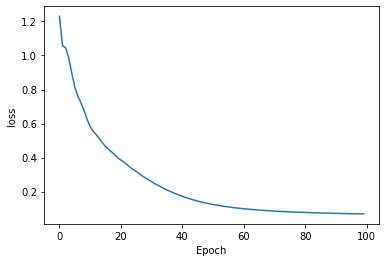

In [9]:
# Write Code !!
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('loss')

### 학습을 통해서 Loss를 감소시켰다면 이제는Test를 해봅니다.
    테스트 할때는 학습의 의미가 없기때문에 Gradient Descent를 사용하지 않도록 합니다.
    그 결과로 컴퓨터 Performance를 높이는 결과를 가져옵니다.
    이때 우리가 테스트하는 데이타는 이미지가 아니고 단순 숫자 값으로 입력된다는 점을 잘 고려해야합니다.
    출력된 값 중에서 가장 높은 값의 인덱스가 바로 target의 라벨이 됩니다.
    
    예측한 값과 정답을 일일이 비교해서 출력하고
    총 30개의 Test 데이타 중에서 정확하게 맞춘 갯수를 최종적으로 출력합니다.

In [10]:
'''
=================예측값 ,정답 출력==================

1) 1 , 1
2) 0 , 0
3) 2 , 2
4) 1 , 1
5) 1 , 1
6) 0 , 0
7) 1 , 1
8) 2 , 2
9) 1 , 1
10) 1 , 1
11) 2 , 2
12) 0 , 0
13) 0 , 0
14) 0 , 0
15) 0 , 0
16) 1 , 1
17) 2 , 2
18) 1 , 1
19) 1 , 1
20) 2 , 2
21) 0 , 0
22) 2 , 2
23) 0 , 0
24) 2 , 2
25) 2 , 2
26) 2 , 2
27) 2 , 2
28) 2 , 2
29) 0 , 0
30) 0 , 0
30개의 Test 데이타 중에서 정답을 맞춘 갯수는  30 개 입니다!!
'''

with torch.no_grad(): 
   
    # Write Code!!
    correct = 0
    total = 0
    cnt = 0
    
    print('=================예측값 ,정답 출력==================')
    
    for labels in y_test:
        cnt = cnt+1
        

        outputs = model(X_train)
        _,predicted = torch.max(outputs.data, 1)

        correct += (predicted == labels).sum().item()
        
        print('{}) {} , {}'.format(cnt,y_test[cnt],labels))
        
print('30개의 Test 데이타 중에서 정답을 맞춘 갯수는  {} 개 입니다!!'.format(correct))

=================예측값 ,정답 출력==================
1) 0 , 1
2) 2 , 0
3) 1 , 2
4) 1 , 1
5) 0 , 1
6) 1 , 0
7) 2 , 1
8) 1 , 2
9) 1 , 1
10) 2 , 1
11) 0 , 2
12) 0 , 0
13) 0 , 0
14) 0 , 0
15) 1 , 0
16) 2 , 1
17) 1 , 2
18) 1 , 1
19) 2 , 1
20) 0 , 2
21) 2 , 0
22) 0 , 2
23) 2 , 0
24) 2 , 2
25) 2 , 2
26) 2 , 2
27) 2 , 2
28) 0 , 2
29) 0 , 0


IndexError: index 30 is out of bounds for dimension 0 with size 30